In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [11]:
X_train_data = np.load('X_kannada_MNIST_train.npz')
X_train = X_train_data['arr_0']


In [12]:
y_train_data = np.load('y_kannada_MNIST_train.npz')
y_train = y_train_data['arr_0']



In [3]:
X_test_data = np.load('X_kannada_MNIST_test.npz')
X_test = X_test_data['arr_0']


In [4]:
y_test_data = np.load('y_kannada_MNIST_test.npz')
y_test = y_test_data['arr_0']

In [14]:
X_train.shape

(60000, 28, 28)

In [13]:
y_train.shape

(60000,)

In [8]:
X_test.shape

(10000, 28, 28)

In [15]:
y_test.shape

(10000,)

In [16]:
X_train_reshape = X_train.reshape(X_train.shape[0], 784)
X_test_reshape = X_test.reshape(X_test.shape[0], 784)


In [17]:
X_train_reshape.shape

(60000, 784)

In [18]:
X_train_reshape

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
X_test_reshape

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [20]:
x_train = pd.DataFrame(X_train_reshape)
x_test = pd.DataFrame(X_test_reshape)


In [21]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# ploting the hand written image randomly

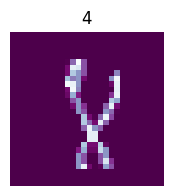

In [23]:
def plot_random_digit():
  random_index = np.random.randint(0,X_train.shape[0])
  plt.imshow(X_train[random_index], cmap='BuPu_r')
  plt.title(y_train[random_index])
  plt.axis('off')
plt.figure(figsize=[2,2])
plot_random_digit()

## performing PCA to 15 components.

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
x_train_pca = pd.DataFrame(x_train_pca)
x_test_pca = pd.DataFrame(x_test_pca)



In [27]:
x_train_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,603.287389,-265.967123,29.543495,-322.438455,297.646540,124.934817,-101.685512,-40.191072,381.173913,-189.120380,113.143664,44.598887,-80.763034,-32.889340,-399.133332
1,298.508140,-97.544810,53.099857,-549.042535,42.398829,-313.896525,-219.938717,244.145434,253.395044,261.466973,-271.818435,290.430421,-29.669825,-50.835862,-84.054979
2,-425.622137,646.150410,433.612093,-152.565075,162.641972,195.898481,43.398397,-399.560638,347.112615,-129.507831,199.043249,77.316311,-46.303688,-56.567129,105.693719
3,-343.828555,100.668116,-415.924140,-8.472794,-103.484611,152.573511,-97.491952,-269.985408,-17.652903,158.045319,12.224738,14.269134,17.757057,-130.695594,52.047183
4,-96.056320,3.559517,-516.641234,125.600965,22.229906,80.804836,69.467171,-87.003843,158.495485,181.062660,-89.760752,-87.575499,36.712116,-173.023324,-177.355821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-210.913976,384.412751,741.318181,144.940670,-227.953594,1.586086,337.755774,56.622393,-338.186179,-4.780529,-11.537781,240.476685,260.857016,-35.556664,326.443953
59996,-411.839792,45.667495,127.140743,-205.793166,-377.401382,-242.371445,121.612257,-321.675858,151.322898,65.298540,-134.051304,116.780894,170.369360,-171.075160,30.070331
59997,-568.865926,5.946091,470.637959,-351.488460,-287.227213,-116.243974,75.660316,-223.249907,149.732484,-164.468109,25.213347,56.916040,-237.994498,-37.987651,41.898490
59998,771.741990,-105.780646,296.496919,460.849182,-471.924372,-82.689123,-108.205365,-84.150317,72.160646,89.760457,96.468069,17.894544,-63.283825,79.544298,315.662183


In [28]:
x_test_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,279.360128,-604.631040,-176.073218,-322.233364,749.389630,-78.009906,196.929998,238.449469,455.075165,-308.476651,322.521752,174.721801,645.741229,672.430224,125.506442
1,68.689918,-153.316940,-59.929870,-475.448171,305.787180,-400.518954,21.656524,303.804002,470.739925,-30.633309,-106.173702,450.879357,91.370969,126.749733,29.749329
2,-173.920106,-101.756186,-158.922314,139.188002,564.145873,-69.081022,138.508381,397.990415,681.330861,252.358994,124.695251,-160.436628,-218.067590,-113.484711,-123.001196
3,-258.215992,62.586052,-502.917234,-5.871721,390.681499,14.052802,-170.743900,109.643139,242.439021,-162.671170,107.249042,-166.627864,37.923741,-59.532898,269.264988
4,-145.295067,51.349010,-517.376321,123.798750,140.383070,106.645773,156.065017,-316.191013,245.061634,151.448742,54.456180,-74.570481,-31.218922,-127.241872,-140.283160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34.943983,102.682865,-382.820434,274.518545,-39.783168,-123.437821,234.971483,195.850837,48.672326,-77.842221,147.700841,-46.720901,0.674392,-155.691581,-87.839640
9996,-508.251360,-177.757905,-130.086211,23.491809,-105.806863,139.530685,-38.962151,-70.662159,89.479247,359.208609,-86.156780,-139.710814,-184.257491,-32.085118,-201.240748
9997,-541.203946,27.851714,55.254110,-84.475766,292.475099,185.022078,-75.201808,51.660672,86.071481,-0.525636,62.428097,48.744637,113.704638,-203.572491,131.945048
9998,648.876451,-49.691590,161.243613,-162.883738,-336.359674,37.120971,260.144968,-25.864070,51.539969,134.711464,-125.345665,-408.927946,-51.003374,70.670141,42.292601


# Normalizing  the data

In [29]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(x_train_pca)
transformed_train_data = mm.transform(x_train_pca)
transformed_test_data = mm.transform(x_test_pca)
x_pca_train_trans = pd.DataFrame(transformed_train_data)
x_pca_test_trans = pd.DataFrame(transformed_test_data)

In [30]:
x_pca_train_trans.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.494385,0.352083,0.393206,0.441502,0.426625,0.469481,0.433477,0.429796,0.481260,0.492842,0.444688,0.481314,0.443485,0.410056,0.479683
std,0.169977,0.137099,0.170133,0.142875,0.128648,0.133331,0.129759,0.135438,0.126806,0.123181,0.129769,0.127498,0.100580,0.116803,0.112089
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.364023,0.263934,0.253559,0.345209,0.349895,0.369762,0.337724,0.331138,0.395654,0.409920,0.357081,0.394454,0.378479,0.328148,0.403292
50%,0.503940,0.335521,0.385296,0.443892,0.429619,0.464238,0.432732,0.423824,0.479527,0.494627,0.446296,0.479286,0.439295,0.405390,0.475791
75%,0.618434,0.405256,0.525669,0.535900,0.508288,0.568324,0.527378,0.521723,0.560950,0.576870,0.534096,0.566519,0.503503,0.487587,0.552246
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## • K-NN Classifier model

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn_pca = KNeighborsClassifier()
params = {'n_neighbors': range(3,10),
          'weights':['uniform', 'distance'],
          'metric':['manhattan','eculidean','cosine']}
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
skf = StratifiedKFold(n_splits = 5)

rcv_knn = RandomizedSearchCV(knn_pca, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv_knn.fit(x_pca_train_trans, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['manhattan', 'eculidean',
                                                   'cosine'],
                                        'n_neighbors': range(3, 10),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [32]:
rcv_knn.best_params_

{'weights': 'uniform', 'n_neighbors': 5, 'metric': 'manhattan'}

In [33]:
rcv_knn.best_score_

0.95595

In [34]:
finalmodel_knn_mnist = knn_pca.set_params(**rcv_knn.best_params_)
finalmodel_knn_mnist.fit(x_pca_train_trans, y_train)
knnpreds_mnist = finalmodel_knn_mnist.predict(x_pca_test_trans)

## Evaluation (KNN)

Precision: 0.9078567857524023
Recall: 0.9043000000000001
F1-score: 0.9037968965103303
Confusion Matrix:
[[800 160   2  14   4   0   1   3  13   3]
 [ 14 962   0   7   5   0   0   1   7   4]
 [  3   1 985   2   1   5   3   0   0   0]
 [ 15  12   1 895  26  25   4  18   2   2]
 [  0   1   0   4 964  16   2   2   4   7]
 [  0   0   0  11  98 884   3   1   2   1]
 [  2   2   0  23  30  14 884  34   0  11]
 [ 11   5   1  34  33   5 106 773   1  31]
 [ 17   9   1   1   3   5   3   0 957   4]
 [  4   9   0   0  13   3  10   2  20 939]]
AUC : 0.9753931188888889


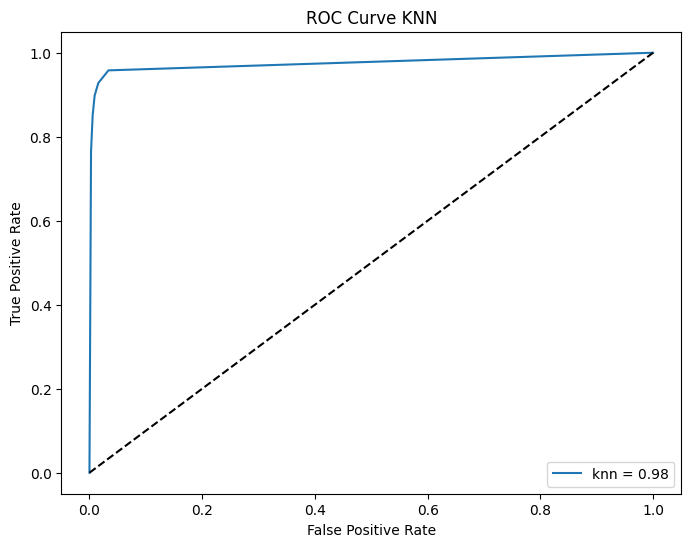

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, knnpreds_mnist,average = 'macro')
recall = recall_score(y_test, knnpreds_mnist,average = 'macro')
f1 = f1_score(y_test, knnpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,knnpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

#calculate AUC

from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_knn = finalmodel_knn_mnist.predict_proba(x_pca_test_trans)
fpr_knn,tpr_knn,thersholds_knn = roc_curve(y_test_bin.ravel(),predict_proba_knn.ravel())
auc = auc(fpr_knn,tpr_knn)

print("AUC :", auc)

# plotting ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'knn = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN')
plt.legend(loc='lower right')
plt.show()

## DECISION TREES

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
model =  DecisionTreeClassifier()

params = {'criterion':['gini','entropy'],
          'splitter':['best','random'],
          'max_depth':range(3,50),
          }

skf = StratifiedKFold(n_splits = 5)

rcv_dt = RandomizedSearchCV(model, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv_dt.fit(x_pca_train_trans, y_train)

rcv_dt.best_score_


0.8952333333333332

In [37]:
rcv_dt.best_params_

{'splitter': 'best', 'max_depth': 43, 'criterion': 'entropy'}

In [38]:
finalmodel_dt_mnist = model.set_params(**rcv_dt.best_params_)
finalmodel_dt_mnist.fit(x_pca_train_trans, y_train)
dtpreds_mnist = finalmodel_dt_mnist.predict(x_pca_test_trans)

## EVALUATION (DECISION TREE)

Precision: 0.8153243879246788
Recall: 0.8146000000000001
F1-score: 0.8140193878023038
Confusion Matrix:
[[729 155  17  28   8   1   4  11  24  23]
 [ 67 828   3  26   6  13   5  11  23  18]
 [  5   2 930  16   6  14   3  15   3   6]
 [ 14  12   9 787  35  17  29  65  20  12]
 [  3   1   1  34 852  44  13   7  16  29]
 [  2   8   7  25 106 808   4   8  15  17]
 [ 10  13   6  46  25  26 788  57   7  22]
 [ 16  14   4  53  26   8 128 693   7  51]
 [ 46  24   8   4   5  14   4   5 879  11]
 [ 20  34   1   2  27   7  10   3  44 852]]
AUC: 0.897


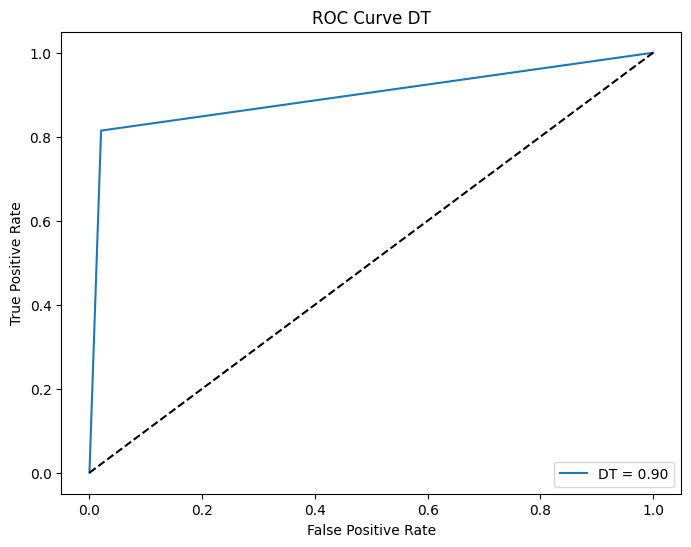

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, dtpreds_mnist,average = 'macro')
recall = recall_score(y_test, dtpreds_mnist,average = 'macro')
f1 = f1_score(y_test, dtpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,dtpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_dt = finalmodel_dt_mnist.predict_proba(x_pca_test_trans)
fpr_dt,tpr_dt,thersholds_dt = roc_curve(y_test_bin.ravel(),predict_proba_dt.ravel())
auc = auc(fpr_dt,tpr_dt)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'DT = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve DT')
plt.legend(loc='lower right')
plt.show()

## RANDOM FOREST

# On non- normalized data

Precision: 0.892624545534167
Recall: 0.8896000000000001
F1-score: 0.888942292703675
Confusion Matrix:
[[799 152   1  19   3   0   2   4  15   5]
 [ 21 922   1  24   5   3   0   1  16   7]
 [  4   1 982   2   0   7   1   0   1   2]
 [  9   9   2 916  13  18   6  23   4   0]
 [  0   0   0  19 932  25   5   3   7   9]
 [  0   1   0  13 110 861   3   5   4   3]
 [  2   7   1  40  18  25 866  25   3  13]
 [  7   7   1  45  24   4 113 753   4  42]
 [ 20   7   1   1   1   5   3   0 960   2]
 [  3   8   0   0  14   0   6   2  62 905]]
AUC: 0.9924327988888889


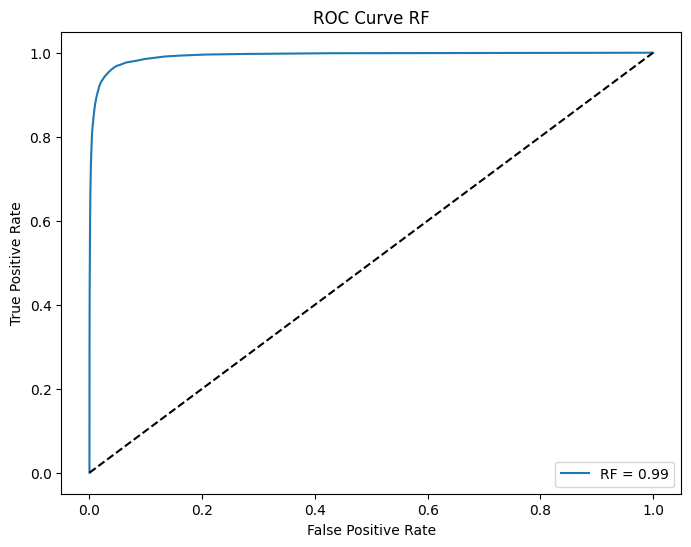

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_mnist = RandomForestClassifier()
rf_mnist.fit(x_train_pca, y_train)
rfpreds_mnist = rf_mnist.predict(x_test_pca)


## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, rfpreds_mnist,average = 'macro')
recall = recall_score(y_test, rfpreds_mnist,average = 'macro')
f1 = f1_score(y_test, rfpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,rfpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = rf_mnist.predict_proba(x_test_pca)
fpr_rf,tpr_rf,thersholds_rf = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_rf,tpr_rf)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RF')
plt.legend(loc='lower right')
plt.show()


# On Normalized data

Precision: 0.8954427231726123
Recall: 0.8922999999999999
F1-score: 0.8917806297392433
Confusion Matrix:
[[798 148   2  20   6   0   2   4  15   5]
 [ 23 923   0  28   3   3   0   0  12   8]
 [  4   1 980   2   0   9   1   1   1   1]
 [  8  10   1 913  17  18   5  22   5   1]
 [  0   1   0  18 938  22   2   3  10   6]
 [  0   1   0  10 113 866   2   2   4   2]
 [  3   6   1  37  17  25 866  26   2  17]
 [  7   8   0  37  24   3 103 772   6  40]
 [ 14   6   1   3   1   5   2   0 966   2]
 [  7   8   0   1  15   0   6   1  61 901]]
AUC: 0.9926365405555556


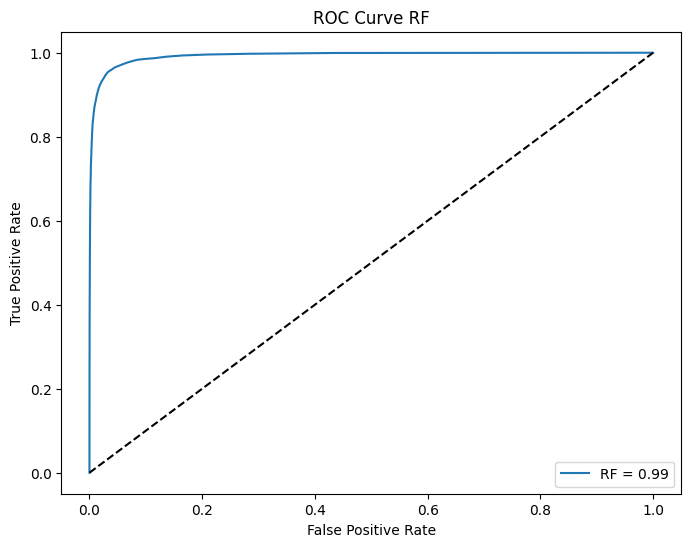

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_mnist = RandomForestClassifier()
rf_mnist.fit(x_pca_train_trans, y_train)
rfpreds_mnist = rf_mnist.predict(x_pca_test_trans)


## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, rfpreds_mnist,average = 'macro')
recall = recall_score(y_test, rfpreds_mnist,average = 'macro')
f1 = f1_score(y_test, rfpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,rfpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = rf_mnist.predict_proba(x_pca_test_trans)
fpr_rf,tpr_rf,thersholds_rf = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_rf,tpr_rf)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RF')
plt.legend(loc='lower right')
plt.show()


# OPTIMIZED MODEL

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
rf_mnist = RandomForestClassifier()

params = {'criterion':['gini','entropy'],
          'n_estimators': range(1,10),
          'max_features':['sqrt', 'log2', None]
          # 'max_depth':range(3,50),
          }



skf = StratifiedKFold(n_splits = 10)

rcv = RandomizedSearchCV(rf_mnist, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv.fit(x_pca_train_trans, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': range(1, 10)},
                   scoring='accuracy')

In [45]:
rcv.best_params_

{'n_estimators': 7, 'max_features': 'log2', 'criterion': 'entropy'}

In [46]:
rcv.best_score_

0.9347000000000001

In [47]:
finalmodel_rf = rf_mnist.set_params(**rcv.best_params_)
finalmodel_rf.fit(x_pca_train_trans, y_train)
rfpreds_mnist = finalmodel_rf.predict(x_pca_test_trans)

Precision: 0.8672891014226078
Recall: 0.8641
F1-score: 0.8634731838134637
Confusion Matrix:
[[771 162   3  25   7   0   3   3  21   5]
 [ 46 897   1  23   3   9   0   1  10  10]
 [  8   1 970   4   2  10   1   2   2   0]
 [ 18  13   1 882  22  17   6  29   9   3]
 [  1   0   0  33 910  31   4   3  11   7]
 [  2   3   2  20 107 848   1   6   7   4]
 [  6  10   8  44  23  23 838  28   8  12]
 [ 14  15   5  49  26   5 124 723   6  33]
 [ 30  16   6   2   3   5   3   0 933   2]
 [ 11  17   1   1  20   3   8   3  67 869]]
AUC: 0.9747650422222223


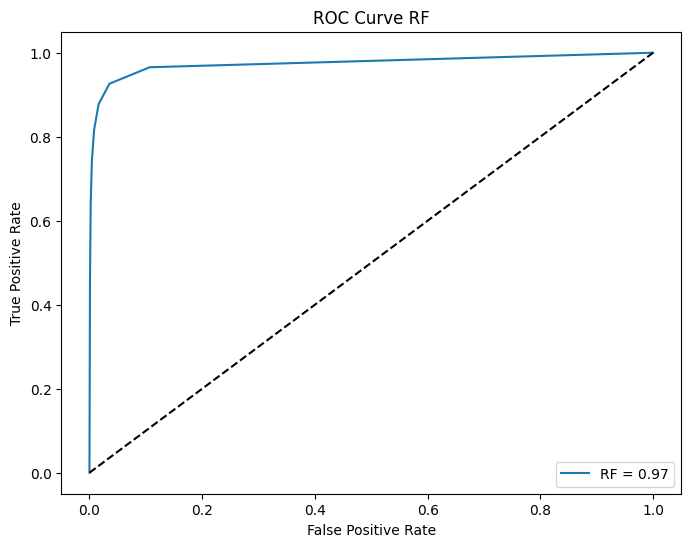

In [48]:
## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, rfpreds_mnist,average = 'macro')
recall = recall_score(y_test, rfpreds_mnist,average = 'macro')
f1 = f1_score(y_test, rfpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,rfpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = finalmodel_rf.predict_proba(x_pca_test_trans)
fpr_rf,tpr_rf,thersholds_rf = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_rf,tpr_rf)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RF')
plt.legend(loc='lower right')
plt.show()

## Naive Bayes

Precision: 0.7869429338218332
Recall: 0.7837
F1-score: 0.7821402547613875
Confusion Matrix:
[[602 236  19  48  11   0   2  13  61   8]
 [ 17 776   8  97  17   6   0   1  60  18]
 [  9   2 977   4   0   5   1   0   1   1]
 [ 17  10   3 790  37  19  32  92   0   0]
 [  0   1   1  18 870  44   2  22  32  10]
 [  0   1   8  34 177 737   5  20  13   5]
 [  6   7  50  21  25  40 786  49   3  13]
 [  7  16   7  51  36   1 192 675   2  13]
 [115  23  20   3   3   6   3   1 818   8]
 [ 26  12   3   0  28   0  13  10 102 806]]
AUC: 0.9735246444444445


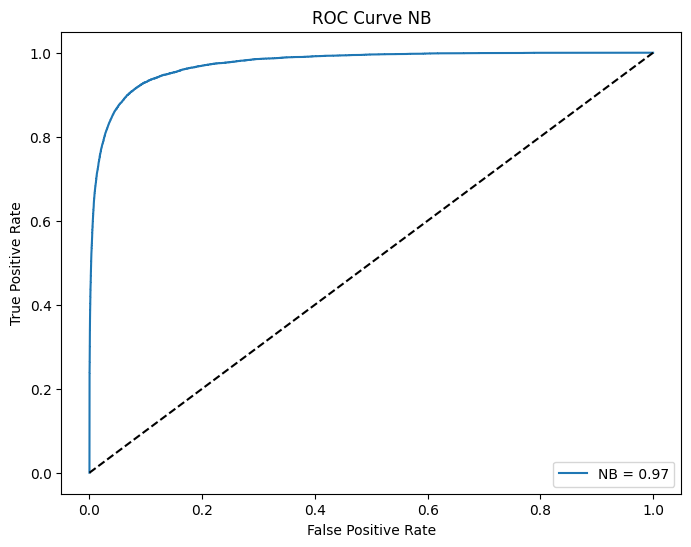

In [50]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_pca_train_trans, y_train)

predictions_nb = naive_bayes.predict(x_pca_test_trans)

## Evaluation

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions_nb,average = 'macro')
recall = recall_score(y_test, predictions_nb,average = 'macro')
f1 = f1_score(y_test, predictions_nb,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,predictions_nb)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = naive_bayes.predict_proba(x_pca_test_trans)
fpr_nb,tpr_nb,thersholds_nb = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_nb,tpr_nb)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'NB = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve NB')
plt.legend(loc='lower right')
plt.show()


## SVM

Precision: 0.9175068148960854
Recall: 0.9148
F1-score: 0.9143799249961674
Confusion Matrix:
[[826 131   1  16   7   0   0   4  12   3]
 [ 13 953   0  12   4   2   2   1   8   5]
 [  3   0 985   2   1   3   1   1   2   2]
 [  7   6   1 914  18  18   7  27   2   0]
 [  0   1   0   8 961  15   2   0   6   7]
 [  0   0   0   8 104 881   3   0   4   0]
 [  1   2   1  13  22  26 911   9   1  14]
 [ 17   6   0  19  19   4  83 804   3  45]
 [  8   3   2   1   2   3   1   0 974   6]
 [  3  11   0   0   9   0   4   1  33 939]]
AUC: 0.9735246444444445


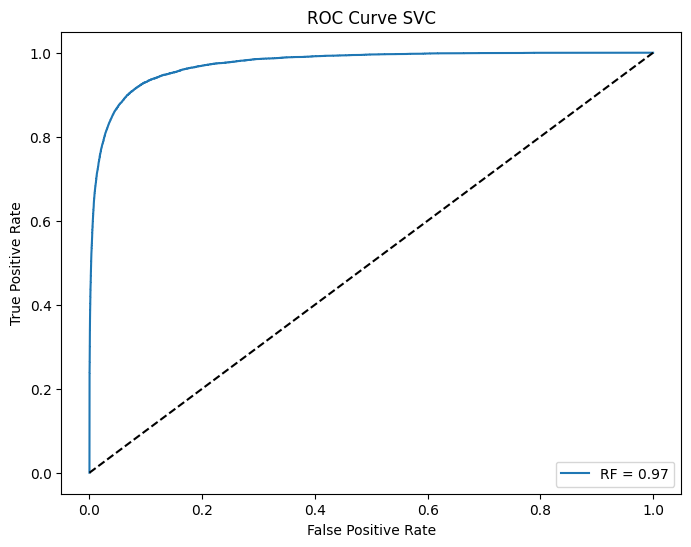

In [51]:
from sklearn.svm import SVC

svc_mnist= SVC(probability = True)
svc_mnist.fit(x_pca_train_trans, y_train)
predictions_svc = svc_mnist.predict(x_pca_test_trans)

## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions_svc,average = 'macro')
recall = recall_score(y_test, predictions_svc,average = 'macro')
f1 = f1_score(y_test, predictions_svc,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,predictions_svc)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_svc = svc_mnist.predict_proba(x_pca_test_trans)
fpr_svc,tpr_svc,thersholds_svc = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_svc,tpr_svc)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, label=f'RF = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVC')
plt.legend(loc='lower right')
plt.show()